<a href="https://colab.research.google.com/github/quantwav/lab3/blob/main/0319_2315_Project_dsff_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [2]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [3]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00


In [4]:
if not os.path.exists("crime_data_2023demo.csv"):
    !gdown 1ngS7TgJyoAJ4LrvmHTMZ9F01ml8YWWjS

Downloading...
From: https://drive.google.com/uc?id=1ngS7TgJyoAJ4LrvmHTMZ9F01ml8YWWjS
To: /content/crime_data_2023demo.csv
100% 3.84M/3.84M [00:00<00:00, 168MB/s]


In [5]:
df_raw_crime = (
    pd.read_csv('crime_data_2023demo.csv')
)
df_raw_crime


<ipython-input-5-64e236d55647>:2: DtypeWarning: Columns (0,2,5,6,7,8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('crime_data_2023demo.csv')


the_geom  cartodb_id  \
0       0101000020E6100000F998388725CA52C0B8E9AE70BBF8...    156712.0   
1       0101000020E6100000EF36D2C68FC252C03254498D9E04...    158366.0   
2       0101000020E6100000F7E2725958C552C05C06397B2908...    176357.0   
3       0101000020E61000006AD97B6D8DC652C07AB107C51C04...    176995.0   
4       0101000020E6100000868C68B7EDC752C04413AC9AB5FE...    178603.0   
...                                                   ...         ...   
169012                                                NaN         NaN   
169013                                                NaN         NaN   
169014                                                NaN         NaN   
169015                                                NaN         NaN   
169016                                                NaN         NaN   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F000099238C9D84EA5FC10D72EEA7D787...  158780.0      3.0   
1       0101000020110F0000C3FBE05AA2DD5FC11EA4D4FD0495...  157978.0     15.0   
2       0101000020110F00002F3E46BB5CE25FC1A7348A39F398...  175404.0      2.0   
3       0101000020110F000010F568BB69E45FC102B540087594...  174916.0      2.0   
4       0101000020110F000025394721C0E65FC18706F24A778E...  180532.0     24.0   
...                                                   ...       ...      ...   
169012                                                NaN       NaN      NaN   
169013                                                NaN       NaN      NaN   
169014                                                NaN       NaN      NaN   
169015                                                NaN       NaN      NaN   
169016                                                NaN       NaN      NaN   

        psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0         1  2023-01-01 01:29:00+00    2022/12/31      20:29:00  20.0   
1         3  2023-01-01 01:33:00+00    2022/12/31      20:33:00  20.0   
2         3  2023-01-01 00:31:00+00    2022/12/31      19:31:00  19.0   
3         1  2023-01-01 01:43:00+00    2022/12/31      20:43:00  20.0   
4         2  2023-01-01 02:07:00+00    2022/12/31      21:07:00  21.0   
...     ...                     ...           ...           ...   ...   
169012  NaN                     NaN           NaN           NaN   NaN   
169013  NaN                     NaN           NaN           NaN   NaN   
169014  NaN                     NaN           NaN           NaN   NaN   
169015  NaN                     NaN           NaN           NaN   NaN   
169016  NaN                     NaN           NaN           NaN   NaN   

              dc_key               location_block  ucr_general  \
0       2.020000e+11           900 BLOCK SOUTH ST        600.0   
1       2.020000e+11        4000 BLOCK COTTMAN AV        600.0   
2       2.020000e+11         7400 BLOCK OXFORD AV        600.0   
3       2.020000e+11  4600 BLOCK E ROOSEVELT BLVD        600.0   
4       2.020000e+11   2700 BLOCK KENSINGTON AV 2        600.0   
...              ...                          ...          ...   
169012           NaN                          NaN          NaN   
169013           NaN                          NaN          NaN   
169014           NaN                          NaN          NaN   
169015           NaN                          NaN          NaN   
169016           NaN                          NaN          NaN   

       text_general_code    point_x    point_y        lat        lng  \
0                 Thefts -75.158541  39.943220  39.943220 -75.158541   
1                 Thefts -75.040025  40.036089  40.036089 -75.040025   
2                 Thefts -75.083517  40.063766  40.063766 -75.083517   
3                 Thefts -75.102382  40.032128  40.032128 -75.102382   
4                 Thefts -75.123884  39.989917  39.989917 -75.123884   
...                  ...        ...        ...        ...        ...   
169012               NaN        NaN  

In [10]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
# df_raw_crime.drop_duplicates(inplace=True)
# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

# Split the dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(df_raw_crime, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))


Training set size: 1466
Testing set size: 367


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-9-4d7bce50dd8d>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


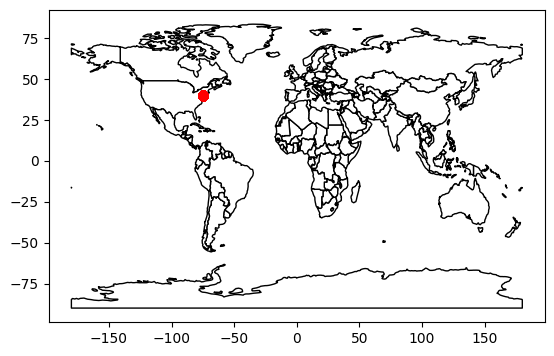

In [9]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(train_data):
    # Create a copy of the DataFrame
    gdf = train_data.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.lng, gdf.lat))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
train_gdf = create_gdf(train_data)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
train_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()
